TITLE OF THE PROJECT.

BANK CUSTOMER CHURN MODEL.

OBJECTIVE

To develop a predictive model that identifies bank customers likely to churn based on historical banking data.

DATA SOURCE

YBI foundation github.

Imort Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Import Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv")

Describe Data

In [3]:
# Display the first few rows and summary of the dataset
print(data.head())
print(data.info())
print(data.describe())


   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  Num Of Products  Has Credit Card  Is Active Member  \
0       0.00                1                1                 1   
1   83807.86                1                0                 1   
2  159660.80                3                1                 0   
3       0.00                2                0                 0   
4  125510.82                1                1                 1   

   Estimated Salary  Churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10

Data Visualization

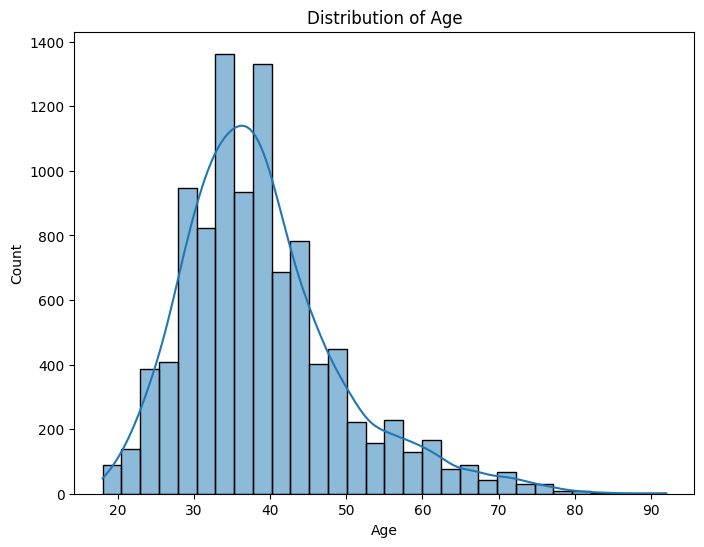

In [4]:
# Example: Visualizing the distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



Data Preprocessing

In [5]:
# Assuming categorical variables like 'Geography' and 'Gender' need encoding
# Example: One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)


Define Target Variable (y) and Feature Variables (x)

In [6]:
# Define features (X) and target (y)
features = ['CreditScore', 'Age', 'Balance', 'Num Of Products', 
            'Has Credit Card', 'Is Active Member', 'Estimated Salary',
            'Geography_Germany', 'Geography_Spain',  # Example for one-hot encoding
            'Gender_Male']  # Example for one-hot encoding

X = data[features]
y = data['Churn']


Train Test Split

In [7]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Modeling

In [8]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Model Evaluation

In [9]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

[[1543   64]
 [ 202  191]]


Prediction

In [10]:
# Example prediction for a new customer (replace with actual data)
new_customer = pd.DataFrame({
    'CreditScore': [700],
    'Age': [35],
    'Balance': [50000],
    'Num Of Products': [2],
    'Has Credit Card': [1],
    'Is Active Member': [1],
    'Estimated Salary': [80000],
    'Geography_Germany': [0],  # Example for one-hot encoding
    'Geography_Spain': [1],    # Example for one-hot encoding
    'Gender_Male': [1]         # Example for one-hot encoding
})

prediction = model.predict(new_customer)
print(f'Predicted churn status: {prediction[0]}')


Predicted churn status: 0


Explanation

Data Description: Provides insights into the dataset's structure and summary statistics.
Visualization: Illustrates distributions or relationships within key variables.
Preprocessing: Handles data encoding and prepares features (X) and target (y) for modeling.
Modeling: Trains a RandomForestClassifier to predict customer churn.
Evaluation: Assesses model performance using accuracy, classification report, and confusion matrix.
Prediction: Demonstrates how to predict churn for new customers using the trained model.